In [11]:
import numpy as np
import pandas as pd
import glob
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio

pio.renderers
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
%matplotlib inline

# I. COVID-19

The first case of COVID-19 (Corona Virus) was discovered in Wuhan, China in December 2019. It then quickly spreaded across the Province Hubei, and around the world, and killing hundred thousands of people. What started as a ... has turned the world upside down, making it one of the worst pandemics in the modern history.

In this analysis, I'm going to take a deeper look at cases around the world, and how it has affected the Economy and Politics in the U.S.

First, let's take a look at number of COVID-19 cases right now. The data is provided by John Hopkins University and updated daily. 

In [3]:
# load data from https://github.com/CSSEGISandData/COVID-19
confirmed = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv?raw=true', index_col = False)
death = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv?raw=true', index_col = False)
recovered = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv?raw=true', index_col = False)


In [4]:
# take a look at the data
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,989,989,989,1005,1005,1024,1024,1045,1045,1045
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171


In [5]:
#Adding Total of Cases for each df and drop unnecessary columns
confirmed = confirmed.groupby('Country/Region').sum().drop(columns = ['Lat', 'Long'])
confirmed.loc['Total Confirmed'] = confirmed.sum()

death = death.groupby('Country/Region').sum().drop(columns = ['Lat', 'Long'])
death.loc['Total Death'] = death.sum()

recovered = recovered.groupby('Country/Region').sum().drop(columns = ['Lat', 'Long'])
recovered.loc['Total Recovered'] = recovered.sum()

In [6]:
#Prepare data before visualization
str_dates = list(confirmed.columns)
dates = [datetime.strptime(x, '%m/%d/%y') for x in str_dates]

In [20]:
#Visual Total Cases over the world
plt.figure(figsize=[30,15])
fig = go.FigureWidget()
fig.add_trace(go.Scatter(x= dates, y= death.loc['Total Death'], 
                         fill="tonexty", fillcolor='red', name = 'Total Death')) 
fig.add_trace(go.Scatter(x= dates, y= recovered.loc['Total Recovered'], 
                         fill="tonexty", fillcolor='green', name = 'Total Recovered'))
fig.add_trace(go.Scatter(x= dates, y= confirmed.loc['Total Confirmed'], 
                         fill="tonexty", fillcolor='orange', name = 'Total Confirmed'))

fig.update_layout(xaxis_rangeslider_visible=True, title='Total Cases Over Time')
fig

FigureWidget({
    'data': [{'fill': 'tonexty',
              'fillcolor': 'red',
              'name': 'Total…

<Figure size 2160x1080 with 0 Axes>

In [18]:
#Prepare Top Countries with Confirmed Data to visualize
top_confirm = confirmed.sort_values(confirmed.columns[-1], ascending = False).drop(index = 'Total Confirmed').head(10)
top_confirm = top_confirm.iloc[:,[- 1]]
top_confirm.reset_index(inplace = True)

In [19]:
#Visualize Top Countries with Confirmed Cases
fig = px.bar(top_confirm, x= top_confirm.columns[1], y= 'Country/Region', 
             width=700, title = 'Top 10 Countries with Most Confirmed Cases as of ' + top_confirm.columns[1], 
             text = top_confirm.columns[1])
fig.update_layout(yaxis_categoryorder = 'total ascending', xaxis_title="Number of Confirmed Cases (Millions)",
    yaxis_title=" ")
iplot(fig)

In [232]:
last_confirm = confirmed.iloc[:,[-1]].rename(columns={confirmed.columns[-1]: 'Confirmed'})
last_death = death.iloc[:,[-1]].rename(columns={death.columns[-1]: 'Death'})
death_confirm = pd.merge(last_confirm, last_death, 
                         on='Country/Region', how='inner').sort_values('Death', 
                                                                       ascending = False).head(10).reset_index()
death_confirm

,Country/Region,Confirmed,Death
0,US,5701679,176802
1,Brazil,3605783,114744
2,Mexico,560164,60480
3,India,3106348,57542
4,United Kingdom,327643,41515
5,Italy,259345,35437
6,France,280459,30518
7,Spain,386054,28838
8,Peru,585236,27453
9,Iran,358905,20643


In [233]:
fig = px.scatter(death_confirm, 
                 x='Confirmed', y='Death', color='Country/Region', size='Confirmed', 
                 height=700, text='Country/Region',  
                 title='Top 10 Countries with Deaths vs Confirmed')
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
fig.show()

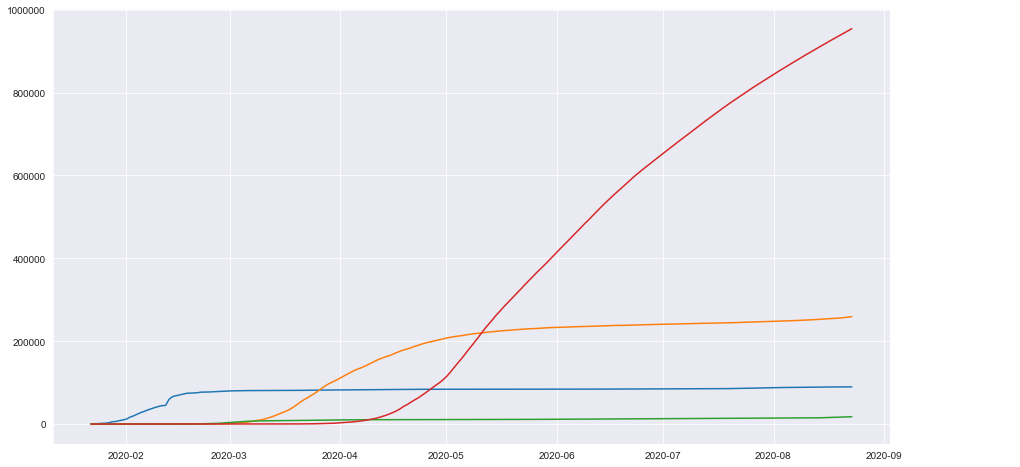

In [240]:
plt.figure(figsize=[15,8])
big = ['China','Italy', 'Russia', 'Korea, South']
for index, row in confirmed.iterrows():
    if index in big:
        plt.plot(dates, row)
        plt.annotate(index,xy=(plt.xticks()[0][-1]+20, row[-1]))
        

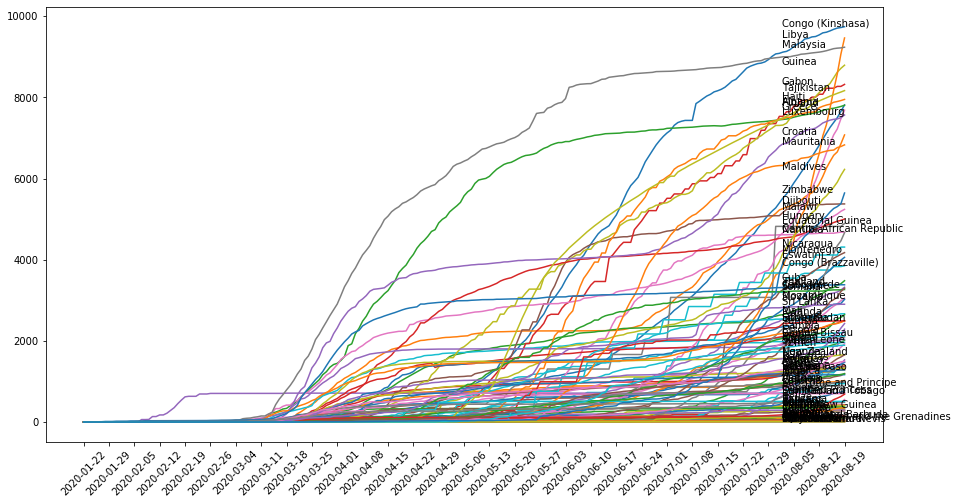

In [77]:
plt.figure(figsize=[15,8])
for index, row in confirmed.iterrows():
    if row[-1] < 10000:
        plt.plot(confirmed_date, row)
        plt.annotate(index,xy=(plt.xticks()[0][-1]+0.7, row[-1]))
plt.xticks(adjust_xticks, rotation=45); 

trump polling

In [277]:
trump = pd.read_csv('/Users/chauchu/Downloads/approval_topline.csv')
trump.head()

,president,subgroup,modeldate,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo,timestamp
0,Donald Trump,Voters,8/21/2020,42.217134,46.648896,37.785372,54.053130,58.978893,49.127367,09:38:23 21 Aug 2020
1,Donald Trump,Adults,8/21/2020,40.926807,44.558043,37.295571,54.983414,58.804909,51.161920,09:36:05 21 Aug 2020
2,Donald Trump,All polls,8/21/2020,41.838234,46.323752,37.352717,54.115066,58.852027,49.378105,09:34:36 21 Aug 2020
3,Donald Trump,All polls,8/20/2020,42.002667,46.328614,37.676720,53.951990,58.491538,49.412441,14:03:42 20 Aug 2020
4,Donald Trump,Adults,8/20/2020,41.195789,44.732425,37.659152,54.683667,58.136434,51.230900,14:05:09 20 Aug 2020


In [278]:
trump = trump.iloc[::-1]
trump = trump[trump['subgroup']== 'All polls']
trump = trump[['modeldate','approve_estimate','disapprove_estimate']].reset_index().drop(columns= 'index')
trump.head()

,modeldate,approve_estimate,disapprove_estimate
0,1/23/2017,45.46693,41.26452
1,1/24/2017,45.44264,41.87849
2,1/25/2017,47.76497,42.52911
3,1/26/2017,44.37598,41.06081
4,1/27/2017,44.13586,41.67268


In [284]:
x = list(trump['modeldate'])
xticks = x[::60]

approve = trump['approve_estimate']
disap = trump['disapprove_estimate']

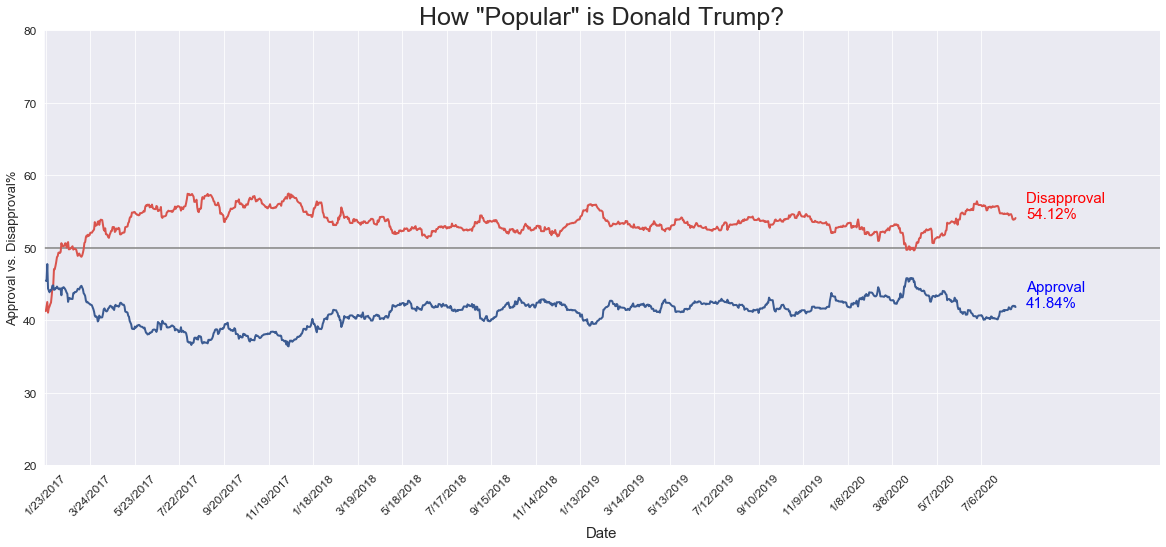

In [307]:
sns.set_style("darkgrid")
plt.figure(figsize=[20,8])
plt.plot(x, disap, sns.xkcd_rgb["pale red"], lw=2)
plt.plot(x, approve, sns.xkcd_rgb["denim blue"], lw=2)
plt.hlines(y=50, xmin=-3, xmax=2500, color ='grey')
plt.ylim(20,80)
plt.xlim(-3,1500)
plt.xticks(xticks, rotation = 45, size = 12)
plt.yticks(size=12)
plt.annotate('Approval \n'+str(approve.values[-1].round(2))+'%', xy=(plt.xticks()[0][-1]+60, 
                                                                     approve.values[-1]), color='blue', size = 15)
plt.annotate('Disapproval \n'+str(disap.values[-1].round(2))+'%', xy=(plt.xticks()[0][-1]+60, 
                                                                      disap.values[-1]), color='red', size = 15)
plt.xlabel('Date', size = 15)
plt.ylabel("Approval vs. Disapproval%", size = 13)
plt.title('How "Popular" is Donald Trump?', size = 25)
plt.show()

In [69]:
import pandas_datareader as pdr
import yfinance as yf

In [132]:
yf.pdr_override() 

stocks = ["^GSPC", '^IXIC', '^GDAXI','^DJI', '^HSI']
start = '2005-08-20'
end = '2020-08-20'

f = pdr.get_data_yahoo(stocks, start=start, end=end, interval = 'wk')
f.head()

Attributes    Adj Close                                                        \
Symbols           ^GSPC        ^IXIC       ^GDAXI          ^DJI          ^HSI   
Date                                                                            
2005-08-21          NaN          NaN  4783.799805           NaN  14982.889648   
2005-08-22  1205.099976  2120.770020          NaN  10397.290039           NaN   
2005-08-28          NaN          NaN  4837.810059           NaN  15221.889648   
2005-08-29  1218.020020  2141.070068          NaN  10447.370117           NaN   
2005-09-04          NaN          NaN  5005.930176           NaN  15165.769531   

Attributes        Close                                                        \
Symbols           ^GSPC        ^IXIC       ^GDAXI          ^DJI          ^HSI   
Date                                                                            
2005-08-21          NaN          NaN  4783.799805           NaN  14982.889648   
2005-08-22  1205.099976  2120.770020          NaN  10397.290039           NaN   
2005-08-28          NaN          NaN  4837.810059           NaN  15221.889648   
2005-08-29  1218.020020  2141.070068          NaN  10447.370117           NaN   
2005-09-04          NaN          NaN  5005.930176           NaN  15165.769531   

Attributes  ...         Open                                          \
Symbols     ...        ^GSPC        ^IXIC       ^GDAXI          ^DJI   
Date        ...                                                        
2005-08-21  ...          NaN          NaN  4933.740234           NaN   
2005-08-22  ...  1219.709961  2140.949951          NaN  10559.230469   
2005-08-28  ...          NaN          NaN  4756.680176           NaN   
2005-08-29  ...  1205.099976  2112.439941          NaN  10396.900391   
2005-09-04  ...          NaN          NaN  4853.600098           NaN   

Attributes                      Volume                             \
Symbols             ^HSI         ^GSPC         ^IXIC       ^GDAXI   
Date                                                                
2005-08-21  15093.179688           NaN           NaN  415624000.0   
2005-08-22           NaN  8.342950e+09  6.980210e+09          NaN   
2005-08-28  14851.679688           NaN           NaN  449554300.0   
2005-08-29           NaN  9.751450e+09  7.090510e+09          NaN   
2005-09-04  15231.769531           NaN           NaN  436334900.0   

Attributes                              
Symbols             ^DJI          ^HSI  
Date                                    
2005-08-21           NaN  1.492118e+09  
2005-08-22  1.063080e+09           NaN  
2005-08-28           NaN  1.638385e+09  
2005-08-29  1.202300e+09           NaN  
2005-09-04           NaN  1.183713e+09  

[5 rows x 30 columns]

In [133]:
f = f.stack()
f.reset_index(inplace = True)
f.replace({'Symbols': {'^GDAXI': 'DAX', '^HSI': 'Hang Seng', '^GSPC': 'SP500', '^IXIC':'NASDAQ', '^DJI':'Dow Jones'}}, 
         inplace = True)
f.head()

Attributes,Date,Symbols,Adj Close,Close,High,Low,Open,Volume
0,2005-08-21,DAX,4783.799805,4783.799805,4954.410156,4783.799805,4933.740234,4.156240e+08
1,2005-08-21,Hang Seng,14982.889648,14982.889648,15244.900391,14832.000000,15093.179688,1.492118e+09
2,2005-08-22,SP500,1205.099976,1205.099976,1228.959961,1204.229980,1219.709961,8.342950e+09
3,2005-08-22,NASDAQ,2120.770020,2120.770020,2156.129883,2118.040039,2140.949951,6.980210e+09
4,2005-08-22,Dow Jones,10397.290039,10397.290039,10641.150391,10383.980469,10559.230469,1.063080e+09


In [134]:
f = f[['Date', 'Symbols', 'Adj Close']]
f.head()

Attributes,Date,Symbols,Adj Close
0,2005-08-21,DAX,4783.799805
1,2005-08-21,Hang Seng,14982.889648
2,2005-08-22,SP500,1205.099976
3,2005-08-22,NASDAQ,2120.770020
4,2005-08-22,Dow Jones,10397.290039


In [135]:
scaler = MinMaxScaler()
x = scaler.fit_transform(f[['Adj Close']])
f['Norm Adj Close'] = x

In [136]:
date = list(f['Date'])
xticks = date[::90]

Text(0.5, 1.0, 'Normalized Value of Stock Index 08/2005 - 08/2020')

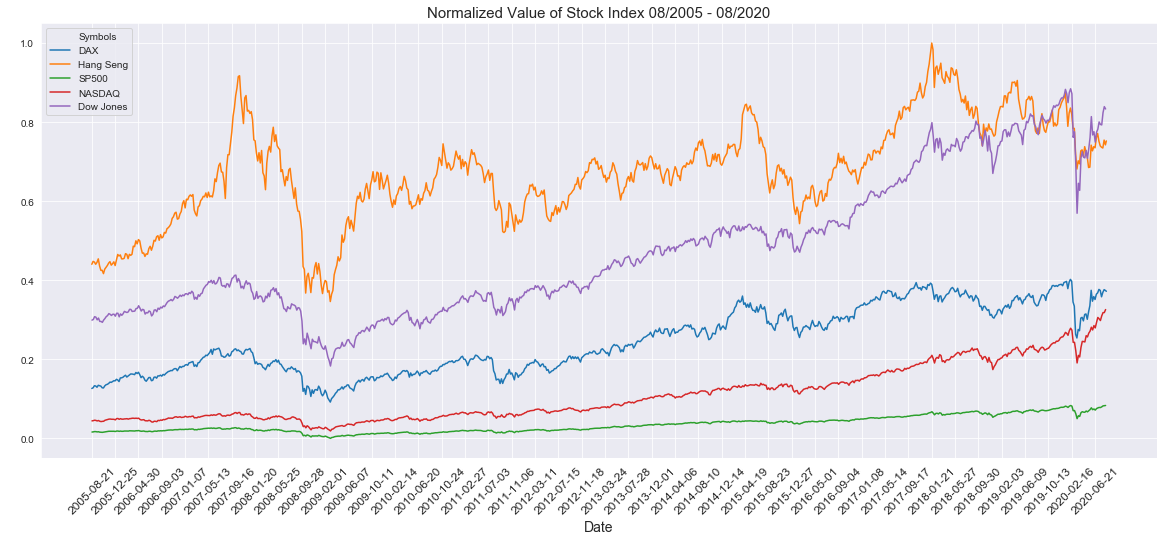

In [138]:
sns.set_style("darkgrid")
plt.figure(figsize=[20,8])
sns.lineplot(data = f, x = 'Date', y = 'Norm Adj Close', hue = 'Symbols')
plt.xticks(xticks, rotation = 45, size = 12)
plt.xlabel('Date', size = 14)
plt.ylabel(" ")
plt.title('Normalized Value of Stock Index 08/2005 - 08/2020', size = 15)

In [140]:
stock_daily = pdr.get_data_yahoo(stocks, start='2019-10-01', end='2020-08-20')
stock_daily = stock_daily.stack()
stock_daily.reset_index(inplace = True)
stock_daily.replace({'Symbols': {'^GDAXI': 'DAX', '^HSI': 'Hang Seng', '^GSPC': 'SP500', '^IXIC':'NASDAQ', '^DJI':'Dow Jones'}}, 
         inplace = True)
stock_daily = stock_daily[['Date', 'Symbols', 'Adj Close']]
stock_daily.head()

Attributes,Date,Symbols,Adj Close
0,2019-10-01,SP500,2940.250000
1,2019-10-01,NASDAQ,7908.680176
2,2019-10-01,DAX,12263.830078
3,2019-10-01,Dow Jones,26573.039062
4,2019-10-02,SP500,2887.610107


In [141]:
scaler = MinMaxScaler()
x = scaler.fit_transform(stock_daily[['Adj Close']])
stock_daily['Norm Adj Close'] = x

Text(0.5, 1.0, 'Normalized Value of Stock Index 10/2019 - 08/2020')

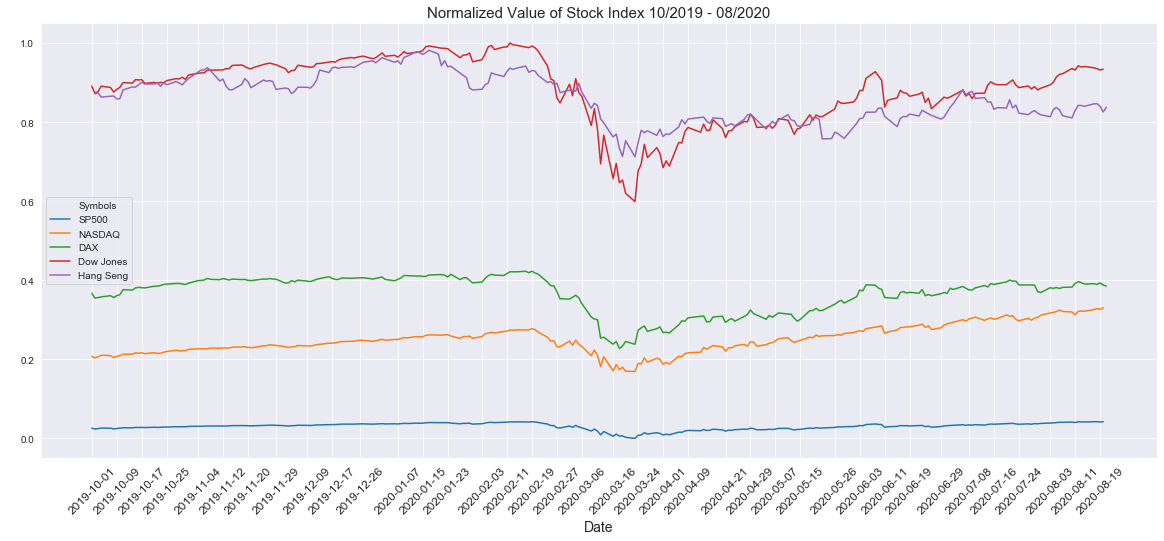

In [142]:
date = list(stock_daily['Date'])
xticks = date[::30]

sns.set_style("darkgrid")
plt.figure(figsize=[20,8])
sns.lineplot(data = stock_daily, x = 'Date', y = 'Norm Adj Close', hue = 'Symbols')
plt.xticks(xticks, rotation = 45, size = 12)
plt.xlabel('Date', size = 14)
plt.ylabel(" ")
plt.title('Normalized Value of Stock Index 10/2019 - 08/2020', size = 15)

In [146]:
stock_daily2000 = pdr.get_data_yahoo(stocks, start='2000-01-01', end='2020-08-20')
stock_daily2000 = stock_daily2000.stack()
stock_daily2000.reset_index(inplace = True)
stock_daily2000.replace({'Symbols': {'^GDAXI': 'DAX', '^HSI': 'Hang Seng', '^GSPC': 'SP500', '^IXIC':'NASDAQ', '^DJI':'Dow Jones'}}, 
         inplace = True)
stock_daily2000 = stock_daily2000[['Date', 'Symbols', 'Close']]
stock_daily2000.head()

Attributes,Date,Symbols,Close
0,2000-01-03,SP500,1455.219971
1,2000-01-03,NASDAQ,4131.149902
2,2000-01-03,DAX,6750.759766
3,2000-01-03,Dow Jones,11357.509766
4,2000-01-03,Hang Seng,17369.630859


In [152]:
stock_daily2000['pct'] = stock_daily2000.sort_values('Date').groupby(['Symbols']).Close.pct_change()*100

In [153]:
sp500 = stock_daily2000[stock_daily2000['Symbols'] == 'SP500'][['Date','Close','pct']]

In [157]:
sp500_biggest_loss = sp500.sort_values('pct', ascending = True).head(10)
sp500_biggest_loss

Attributes,Date,Close,pct
25343,2020-03-16,2386.129883,-11.984055
25333,2020-03-12,2480.639893,-9.511268
11030,2008-10-15,907.840027,-9.034978
11192,2008-12-01,816.210022,-8.929524
10972,2008-09-29,1106.420044,-8.806776
11010,2008-10-09,909.919983,-7.616710
25318,2020-03-09,2746.560059,-7.596970
11160,2008-11-20,752.440002,-6.712293
14562,2011-08-08,1119.459961,-6.663446
11155,2008-11-19,806.580017,-6.115558


In [158]:
sp500_biggest_gain = sp500.sort_values('pct', ascending = False).head(10)
sp500_biggest_gain

Attributes,Date,Close,pct
11020,2008-10-13,1003.349976,11.580037
11075,2008-10-28,940.510010,10.789006
25373,2020-03-24,2447.330078,9.382774
25338,2020-03-13,2711.020020,9.287125
11569,2009-03-23,822.919983,7.075755
25418,2020-04-06,2663.679932,7.033132
11135,2008-11-13,911.289978,6.921271
11170,2008-11-24,851.809998,6.472253
11524,2009-03-10,719.599976,6.366302
11165,2008-11-21,800.030029,6.324760
